In [42]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
from collections import Counter

In [43]:
images = "./flickr/Images"
text = "./flickr/captions.txt"

In [44]:
# Reduce number of images and captions for test purposes:
import os
from IPython.display import Image, display
# Get a list of image files in the directory
image_files = [f for f in os.listdir(images) if f.lower()]
print(image_files)
# Display images
# for image_file in image_files:
    # image_path = os.path.join(images, image_file)
    # display(Image(filename=image_path))


['3048380686_732db55281.jpg', '3091177347_58c85c1c3b.jpg', '2603690144_7a28b1d13c.jpg', '3360930596_1e75164ce6.jpg', '2932740428_b15384f389.jpg', '3591461782_687e320042.jpg', '2619267133_53a5904ef4.jpg', '3547524138_4157f660b0.jpg', '3359636318_39267812a0.jpg', '3672109677_8caa992671.jpg', '3237760601_5334f3f3b5.jpg', '3154152744_4e93ec8a62.jpg', '280932151_ae14a67be5.jpg', '1311388430_4ab0cd1a1f.jpg', '2431832075_00aa1a4457.jpg', '3239021459_a6b71bb400.jpg', '269986132_91b71e8aaa.jpg', '3442844140_15aa45e9b8.jpg', '224026428_0165164ceb.jpg', '542317719_ed4dd95dc2.jpg', '3212625256_685bc4de99.jpg', '1803631090_05e07cc159.jpg', '390987167_2d5905b459.jpg', '2689163361_4939875be5.jpg', '2978735290_7464b12270.jpg', '3497224764_6e17544e0d.jpg', '3564157681_03a13b7112.jpg', '530950375_eea665583f.jpg', '3025549604_38b86198f5.jpg', '3437034427_6df5e9fbf9.jpg', '507758961_e63ca126cc.jpg', '775664534_3f6de7d413.jpg', '2708744743_e231f7fcf9.jpg', '2873065944_29c01782e2.jpg', '537628742_146f2c24f8

In [45]:
# Open the file in read mode
with open("./flickr/captions.txt", 'r') as file:
    content = file.read()
c=0
filenames = []
captions = []
for line in content.split('\n'):
    c+=1
    if c == 1 or c == 40457:
        continue
    x = line.split('.jpg')
    filenames.append(x[0]+".jpg")
    captions.append(x[1].lower()[1:])
    # if c == 10: break
    # if len(x) != 2:
    #     print(x)
    #     print(c)

In [46]:
len(captions)

40455

In [47]:
index = list(range(1, len(filenames) + 1))

# Create the DataFrame
df = pd.DataFrame({
    "filename": filenames,
    "index": index,
    "caption": captions
})

In [48]:
df.head(50)

,filename,index,caption
0,1000268201_693b08cb0e.jpg,1,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,2,a girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,3,a little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,4,a little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,5,a little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,6,a black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,7,a black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,8,a black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,9,two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,10,two dogs on pavement moving toward each other .


In [49]:
df = df.iloc[:100]
print(df.head())

                    filename  index  \
0  1000268201_693b08cb0e.jpg      1   
1  1000268201_693b08cb0e.jpg      2   
2  1000268201_693b08cb0e.jpg      3   
3  1000268201_693b08cb0e.jpg      4   
4  1000268201_693b08cb0e.jpg      5   

                                             caption  
0  a child in a pink dress is climbing up a set o...  
1              a girl going into a wooden building .  
2   a little girl climbing into a wooden playhouse .  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...  


In [50]:
filename = df['filename']
captions = df['caption']
print(filenames)
# print(captions)

['1000268201_693b08cb0e.jpg', '1000268201_693b08cb0e.jpg', '1000268201_693b08cb0e.jpg', '1000268201_693b08cb0e.jpg', '1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg', '1001773457_577c3a7d70.jpg', '1001773457_577c3a7d70.jpg', '1001773457_577c3a7d70.jpg', '1001773457_577c3a7d70.jpg', '1002674143_1b742ab4b8.jpg', '1002674143_1b742ab4b8.jpg', '1002674143_1b742ab4b8.jpg', '1002674143_1b742ab4b8.jpg', '1002674143_1b742ab4b8.jpg', '1003163366_44323f5815.jpg', '1003163366_44323f5815.jpg', '1003163366_44323f5815.jpg', '1003163366_44323f5815.jpg', '1003163366_44323f5815.jpg', '1007129816_e794419615.jpg', '1007129816_e794419615.jpg', '1007129816_e794419615.jpg', '1007129816_e794419615.jpg', '1007129816_e794419615.jpg', '1007320043_627395c3d8.jpg', '1007320043_627395c3d8.jpg', '1007320043_627395c3d8.jpg', '1007320043_627395c3d8.jpg', '1007320043_627395c3d8.jpg', '1009434119_febe49276a.jpg', '1009434119_febe49276a.jpg', '1009434119_febe49276a.jpg', '1009434119_febe49276a.jpg', '1009434119_f

In [51]:
unique_files = np.unique(df.filename.values)
print(len(unique_files))

20


In [52]:
# To find captions of an image
cap = df[df['filename'] == "1000268201_693b08cb0e.jpg"]['caption']

print(cap)

0    a child in a pink dress is climbing up a set o...
1                a girl going into a wooden building .
2     a little girl climbing into a wooden playhouse .
3    a little girl climbing the stairs to her playh...
4    a little girl in a pink dress going into a woo...
Name: caption, dtype: object


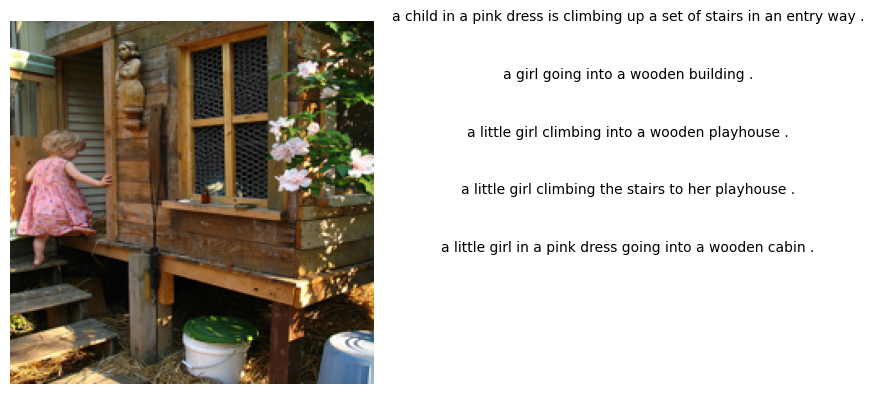

In [53]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = './flickr/Images/1000268201_693b08cb0e.jpg'
image = Image.open(image_path).resize((224, 224))

# plt.imshow(image)
# Create a figure with a specified size
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the image in the left subplot
axs[0].imshow(image)
axs[0].axis('off')  # Turn off axis for the image

# Display the captions in the right subplot
axs[1].axis('off')  # Turn off axis for the caption area
for i, caption in enumerate(cap):
    axs[1].text(0.5, 1 - (i * 0.15), caption, ha='center', va='top', fontsize=10)

# Adjust layout to allocate more space to the image
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.2)
plt.show()

In [54]:
# Making a dictionary which contains most frequent wor
def freq(df):
    vocab = []
    c = 0
    for t in df.caption.values:
        vocab.extend(t.split())
    ct = Counter(vocab)
    words = pd.DataFrame({"word":ct.keys(), "count":ct.values()})
    words = words.sort_values(by="count", ascending=False)
    print("Total number of words",len(words))
    return words
words = freq(df)
print(words)

Total number of words 281
        word  count
0          a    168
14         .     88
22       the     62
2         in     50
27       dog     48
..       ...    ...
151   smiles      1
152    stony      1
156  working      1
158    aross      1
280  fishing      1

[281 rows x 2 columns]


In [55]:
# Removing punctuation, single characters and numeric characters
import re
pattern = r'[^\w\s]|\b\w\b|\d'

# Sample string
text = "Hello! This is a sample text, with numbers 123 and single chars like a, b, and punctuations!!!"

# Remove punctuations, single characters, and numbers
cleaned_text = re.sub(pattern, '', text)
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
print(cleaned_text)

Hello This is sample text with numbers and single chars like and punctuations


In [56]:
def cleaning_text(text):
    return re.sub(r'\s+', ' ', re.sub(pattern, '', text))
    
for i, caption in enumerate(df.caption.values):
    newcaption = cleaning_text(caption).strip()
    df.loc[i, "caption"] = newcaption

In [57]:
df.head(5)

,filename,index,caption
0,1000268201_693b08cb0e.jpg,1,child in pink dress is climbing up set of stai...
1,1000268201_693b08cb0e.jpg,2,girl going into wooden building
2,1000268201_693b08cb0e.jpg,3,little girl climbing into wooden playhouse
3,1000268201_693b08cb0e.jpg,4,little girl climbing the stairs to her playhouse
4,1000268201_693b08cb0e.jpg,5,little girl in pink dress going into wooden cabin


In [58]:
words = freq(df)
print(words)

Total number of words 273
        word  count
20       the     62
1         in     50
25       dog     49
32      with     30
4         is     28
..       ...    ...
149  working      1
151    aross      1
152  walking      1
153    paved      1
272  fishing      1

[273 rows x 2 columns]


In [59]:
# Adding start and end sequences
def add_start_end_tokens(caption):
    return "startseq " + caption + " endseq"

df["caption"] = df["caption"].apply(add_start_end_tokens)

In [19]:
import torch
import torchvision.models as models
import torch.nn as nn

vgg16 = models.vgg16(weights='VGG16_Weights.DEFAULT')
vgg16.classifier = nn.Sequential(*list(vgg16.classifier.children())[:-1])
vgg16 = vgg16.to('cuda')
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [20]:
vgg16(torch.randn(2,3,224,224).to('cuda'))

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0',
       grad_fn=<NativeDropoutBackward0>)

In [60]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is enabled
print(torch.version.cuda)

True
12.4


In [61]:
import os
# all_images = os.listdir("./flickr/Images")
filename = filename.tolist()
print(type(all_images))
print(type(filename))

<class 'list'>
<class 'list'>


In [62]:
# from keras.preprocessing.image import load_img, img_to_array
# from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
import os
from torchvision import transforms
images = OrderedDict()
npix = 224
target_size = (npix,npix)
# data = np.zeros((len(jpgs),npix,npix,3))
preprocess = transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize using ImageNet stats
]
)

c = 0
all_images = os.listdir("./flickr/Images")
# Comment out the next line to use all images
all_images = filename
for i,name in enumerate(all_images):
    c += 1
    # print(name)
    # load an image from file
    filename = './flickr/Images/' + name
    image = Image.open(filename)
    image = preprocess(image)
    # print(image)
    image = image.unsqueeze(0) # To add batch dimension
    image = image.to('cuda')
    with torch.no_grad():
        y_pred = vgg16(image)
    images[name] = y_pred
    # print(f"name: {name}, y_pred: {y_pred}")
    # print(f"Updated images: {images}")
    # 8091 total images
    if c % 100 == 0: print("Image",c,"processed")
    # if c == 300: break

Image 100 processed


In [63]:
len(images)

20

In [45]:
# Using PCA to visualise the 4096 dimensional space in 2 dimensions

from sklearn.decomposition import PCA

# encoder = np.array()

In [46]:
# DO visualisation of PCA space later



In [64]:
# Removing captions and images that do not have corresponding images/captions

keptimages, keepindex = [],[]

for index, filename in enumerate(df.filename):
    # print(index)
    if filename in all_images:
        keptimages.append(images[filename])
        keepindex.append(index)

filenames = df["filename"].iloc[keepindex].values
captions = df["caption"].iloc[keepindex].values
keptimages = [image.cpu().numpy() for image in keptimages]
# keptimages = np.array(keptimages)

In [65]:
len(keepindex)

100

In [27]:
# from transformers import AutoTokenizer
# from collections import Counter

# # Initialize tokenizer for a specific model, e.g., BERT's tokenizer
# tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# # Tokenize the captions using the tokenizer
# tokenized_captions = [tokenizer.tokenize(caption) for caption in df["caption"]]

# # Count the frequency of words
# counter = Counter([word for caption in tokenized_captions for word in caption])

# # Limit vocabulary to num_words most common words
# num_words = 8000
# vocab = counter.most_common(num_words)

# # Create a word-to-index mapping
# word_index = {word: idx + 1 for idx, (word, _) in enumerate(vocab)}

# # Add 1 to the vocabulary size to account for special tokens
# vocab_size = len(word_index) + 1
# print("vocabulary size : {}".format(vocab_size))

# # Convert texts to sequences
# captions = [[word_index[word] for word in caption if word in word_index] for caption in tokenized_captions]
# print(captions[:5])

In [66]:
import nltk
from collections import Counter

# Download the punkt tokenizer from nltk
nltk.download('punkt')

# Initialize the NLTK tokenizer
tokenizer = nltk.word_tokenize

# Tokenize the text and count word frequencies
tokenized_captions = [tokenizer(caption) for caption in captions]
counter = Counter(word for caption in tokenized_captions for word in caption)

# Set the maximum vocabulary size
nb_words = 8000
# Keep the most common words and assign special tokens
special_tokens = ['<unk>', '<pad>']
vocab = {word: idx+2 for idx, (word, _) in enumerate(counter.most_common(nb_words - 2))}
vocab.update({token: idx for idx, token in enumerate(special_tokens)})

# Print vocabulary size
vocab_size = len(vocab)
print(f"Vocabulary size: {vocab_size}")

# Convert captions to sequences of integers based on vocabulary
dtexts = [[vocab.get(token, vocab['<unk>']) for token in caption] for caption in tokenized_captions]

# Print the first 5 sequences
print(dtexts[:5])


Vocabulary size: 277
[[2, 31, 5, 69, 93, 8, 21, 70, 94, 13, 95, 5, 27, 151, 152, 3], [2, 18, 96, 71, 47, 153, 3], [2, 22, 18, 21, 71, 47, 97, 3], [2, 22, 18, 21, 4, 95, 14, 98, 97, 3], [2, 22, 18, 5, 69, 93, 96, 71, 47, 154, 3]]


[nltk_data] Downloading package punkt to /home/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
# Train and test data split

length = len(captions)
test_num = 0.2 * length
val_num = 0.2 * length

def split(data, test_num, val_num):
    return(data[:test_num], data[test_num:test_num+val_num], data[test_num+val_num:])
test_num = int(test_num)
val_num = int(val_num)
caption_test, caption_val, caption_train = split(captions, test_num, val_num)
image_test, image_val, image_train = split(keptimages, test_num, val_num)
fname_test, fname_val, fname_train = split(filenames, test_num, val_num)

In [68]:
# To find maximum length of captions:

maxlen = np.max([len(text) for text in dtexts])
print(maxlen)

21


In [73]:
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F
import torch

def preprocessing(captions, images):
    N = len(captions)
    print("# captions/images = {}".format(N))

    assert(N == len(images))
    Xtext, Ximage, ytext = [], [], []

    for text, image in zip(captions, images):  # Change 'keptimages' to 'images'
        for i in range(1, len(text)):
            in_text, out_text = text[:i], text[i]
            
            # Convert tokens in `in_text` to their corresponding index in the vocab
            in_text = [vocab.get(word, vocab['<unk>']) for word in in_text]  # Handle unknown words with '<unk>'
            
            # Convert to tensor
            in_text_tensor = torch.tensor(in_text)
            in_text_tensor = in_text_tensor[-maxlen:]  # Ensure the sequence is within the max length
            
            # Convert the output token to a one-hot vector
            out_text = F.one_hot(torch.tensor(vocab.get(out_text, vocab['<unk>'])), num_classes=vocab_size).float()
            
            # Convert image to tensor if it's not already
            image_tensor = torch.tensor(image) if isinstance(image, np.ndarray) else image  # Convert if it's a numpy array
            
            Xtext.append(in_text_tensor)
            Ximage.append(image_tensor)
            ytext.append(out_text)

    # Now pad the sequences in Xtext to the same length
    Xtext = pad_sequence(Xtext, batch_first=True, padding_value=vocab['<pad>'])
    Ximage = torch.stack(Ximage)  # Stack after ensuring each image is a tensor
    ytext = torch.stack(ytext)
    
    print("Xtext shape: {}, Ximage shape: {}, ytext shape: {}".format(Xtext.shape, Ximage.shape, ytext.shape))
    return Xtext, Ximage, ytext

Xtext_train, Ximage_train, ytext_train = preprocessing(caption_train, image_train)
Xtext_val, Ximage_val, ytext_val = preprocessing(caption_val, image_val)


# captions/images = 60
Xtext shape: torch.Size([3899, 21]), Ximage shape: torch.Size([3899, 1, 4096]), ytext shape: torch.Size([3899, 277])
# captions/images = 20
Xtext shape: torch.Size([1328, 21]), Ximage shape: torch.Size([1328, 1, 4096]), ytext shape: torch.Size([1328, 277])


In [70]:
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F
import torch

def preprocessing(captions, images):
    N = len(captions)
    print("# captions/images = {}".format(N))

    assert(N == len(images))
    Xtext, Ximage, ytext = [], [], []

    for text, image in zip(captions, images):  # Change 'keptimages' to 'images'
        for i in range(1, len(text)):
            in_text, out_text = text[:i], text[i]
            
            # Convert tokens in `in_text` to their corresponding index in the vocab
            in_text = [vocab.get(word, vocab['<unk>']) for word in in_text]  # Handle unknown words with '<unk>'
            
            # Convert to tensor
            in_text_tensor = torch.tensor(in_text)
            in_text_tensor = in_text_tensor[-maxlen:]  # Ensure the sequence is within the max length
            
            # Convert the output token to a one-hot vector
            out_text = F.one_hot(torch.tensor(vocab.get(out_text, vocab['<unk>'])), num_classes=vocab_size).float()
            
            # Convert image to tensor if it's not already
            image_tensor = torch.tensor(image) if isinstance(image, np.ndarray) else image  # Convert if it's a numpy array
            
            Xtext.append(in_text_tensor)
            Ximage.append(image_tensor)
            ytext.append(out_text)

    # Now pad the sequences in Xtext to the same length
    Xtext = pad_sequence(Xtext, batch_first=True, padding_value=vocab['<pad>'])
    Ximage = torch.stack(Ximage)  # Stack after ensuring each image is a tensor
    ytext = torch.stack(ytext)
    
    print("Xtext shape: {}, Ximage shape: {}, ytext shape: {}".format(Xtext.shape, Ximage.shape, ytext.shape))
    return Xtext, Ximage, ytext

Xtext_train, Ximage_train, ytext_train = preprocessing(caption_train, image_train)
Xtext_val, Ximage_val, ytext_val = preprocessing(caption_val, image_val)


# captions/images = 60
Xtext shape: torch.Size([3899, 21]), Ximage shape: torch.Size([3899, 1, 4096]), ytext shape: torch.Size([3899, 277])
# captions/images = 20
Xtext shape: torch.Size([1328, 21]), Ximage shape: torch.Size([1328, 1, 4096]), ytext shape: torch.Size([1328, 277])


In [76]:
# Instead of using torch.stack, use torch.cat after unsqueezing each image tensor
Ximage_val = torch.cat([img.unsqueeze(0) if img.ndim == 1 else img for img in Ximage_val], dim=0)
print(Ximage_val.shape)

torch.Size([1328, 4096])


In [32]:
# CODE ABOVE IS FIXED VERSION OF CODE BELOW

# from torch.nn.utils.rnn import pad_sequence
# import torch.nn.functional as F

# def preprocessing(captions,images):
#     N = len(captions)
#     print("# captions/images = {}".format(N))

#     assert(N==len(images))
#     Xtext, Ximage, ytext = [],[],[]
#     for text,image in zip(captions,keptimages):

#         for i in range(1,len(text)):
#             in_text, out_text = text[:i], text[i]
#             in_text = pad_sequence([torch.tensor(in_text)],batch_first=True,padding_value=0)
#             in_text = in_text.flatten()[-maxlen:]
#             out_text = F.one_hot(torch.tensor(out_text), num_classes=vocab_size).float()
            
#             Xtext.append(in_text)
#             Ximage.append(image)
#             ytext.append(out_text)

#     Xtext  = torch.stack(Xtext)
#     Ximage = torch.stack(Ximage)
#     ytext  = torch.stack(ytext)
#     print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
#     return(Xtext,Ximage,ytext)


# Xtext_train, Ximage_train, ytext_train = preprocessing(caption_train,image_train)
# Xtext_val,   Ximage_val,   ytext_val   = preprocessing(caption_val,image_val)

In [89]:
vocab

{'startseq': 2,
 'endseq': 3,
 'the': 4,
 'in': 5,
 'dog': 6,
 'with': 7,
 'is': 8,
 'on': 9,
 'and': 10,
 'white': 11,
 'man': 12,
 'of': 13,
 'to': 14,
 'black': 15,
 'at': 16,
 'running': 17,
 'girl': 18,
 'water': 19,
 'snow': 20,
 'climbing': 21,
 'little': 22,
 'brown': 23,
 'ball': 24,
 'are': 25,
 'grass': 26,
 'an': 27,
 'front': 28,
 'hat': 29,
 'through': 30,
 'child': 31,
 'sitting': 32,
 'next': 33,
 'red': 34,
 'near': 35,
 'boy': 36,
 'rock': 37,
 'catch': 38,
 'yellow': 39,
 'playing': 40,
 'bench': 41,
 'by': 42,
 'orange': 43,
 'over': 44,
 'field': 45,
 'lake': 46,
 'wooden': 47,
 'each': 48,
 'other': 49,
 'street': 50,
 'two': 51,
 'rainbow': 52,
 'large': 53,
 'it': 54,
 'young': 55,
 'while': 56,
 'him': 57,
 'glasses': 58,
 'wearing': 59,
 'green': 60,
 'edge': 61,
 'wall': 62,
 'tree': 63,
 'person': 64,
 'people': 65,
 'toy': 66,
 'couple': 67,
 'ice': 68,
 'pink': 69,
 'up': 70,
 'into': 71,
 'looking': 72,
 'small': 73,
 'his': 74,
 'park': 75,
 'rope': 76,


In [95]:
import torch
import torch.nn as nn

class CombinedModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, maxlen, image_dim, lstm_units, dense_units, output_units):
        super(CombinedModel, self).__init__()
        
        # Text input and embedding
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        
        # LSTM for text features
        self.lstm = nn.LSTM(embedding_dim, lstm_units, batch_first=True)
        
        # Fully connected layer for image features
        self.image_dense = nn.Linear(image_dim, dense_units)
        
        # Add operation for combining text and image features
        self.combine_dense1 = nn.Linear(lstm_units, dense_units)  # To match image dense units
        
        # Fully connected layers after combination
        self.fc1 = nn.Linear(dense_units, dense_units)
        self.fc2 = nn.Linear(dense_units, output_units)
        
        # Activation functions
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=-1)
        
    def forward(self, text_input, image_input):
        # Text features
        embedded_text = self.embedding(text_input)  # (batch_size, maxlen, embedding_dim)
        lstm_output, _ = self.lstm(embedded_text)   # (batch_size, maxlen, lstm_units)
        lstm_output = lstm_output[:, -1, :]         # (batch_size, lstm_units)
        
        # Image features
        image_features = self.relu(self.image_dense(image_input))  # (batch_size, dense_units)
        
        # Combine text and image features
        combined = self.relu(lstm_output + image_features)  # (batch_size, dense_units)
        
        # Fully connected layers
        x = self.relu(self.fc1(combined))  # (batch_size, dense_units)
        x = self.fc2(x)                    # (batch_size, output_units)
        return self.softmax(x)

# Model parameters
vocab_size = 21
embedding_dim = 64
image_dim = 4096
lstm_units = 256
dense_units = 256
output_units = vocab_size

# Instantiate the model
model = CombinedModel(vocab_size, embedding_dim, maxlen, image_dim, lstm_units, dense_units, output_units)
print(model)


CombinedModel(
  (embedding): Embedding(21, 64, padding_idx=0)
  (lstm): LSTM(64, 256, batch_first=True)
  (image_dense): Linear(in_features=4096, out_features=256, bias=True)
  (combine_dense1): Linear(in_features=256, out_features=256, bias=True)
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=21, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=-1)
)


In [97]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import time

# Convert ytext from one-hot to class indices
ytext_train_indices = torch.argmax(torch.tensor(ytext_train), dim=1)
ytext_val_indices = torch.argmax(torch.tensor(ytext_val), dim=1)

# Prepare DataLoaders
batch_size = 64
train_dataset = TensorDataset(torch.tensor(Ximage_train).float(),
                               torch.tensor(Xtext_train).long(),
                               ytext_train_indices.long())
val_dataset = TensorDataset(torch.tensor(Ximage_val).float(),
                             torch.tensor(Xtext_val).long(),
                             ytext_val_indices.long())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Move model to GPU
# model = CombinedModel(vocab_size=277, embedding_dim=64, lstm_units=256, image_dim=4096).cuda()
model = CombinedModel(vocab_size, embedding_dim, maxlen, image_dim, lstm_units, dense_units, output_units).cuda()

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 5
start = time.time()

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for Ximage, Xtext, y in train_loader:
        # Move inputs and targets to GPU
        Ximage, Xtext, y = Ximage.cuda(), Xtext.cuda(), y.cuda()
        
        optimizer.zero_grad()
        outputs = model(Ximage, Xtext)  # Forward pass
        loss = criterion(outputs, y)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        train_loss += loss.item()
    
    train_loss /= len(train_loader)

    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for Ximage, Xtext, y in val_loader:
            Ximage, Xtext, y = Ximage.cuda(), Xtext.cuda(), y.cuda()
            outputs = model(Ximage, Xtext)
            loss = criterion(outputs, y)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

end = time.time()
print("TIME TOOK {:3.2f} MIN".format((end - start) / 60))


/tmp/ipykernel_2155/1516773038.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ytext_train_indices = torch.argmax(torch.tensor(ytext_train), dim=1)
/tmp/ipykernel_2155/1516773038.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ytext_val_indices = torch.argmax(torch.tensor(ytext_val), dim=1)
/tmp/ipykernel_2155/1516773038.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(Ximage_train).float(),
/tmp/ipykernel_2155/1516773038.py:12: UserWarning: To copy construct from a tensor, it is reco

RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.cuda.FloatTensor instead (while checking arguments for embedding)

In [100]:
from keras import layers
print(vocab_size)
## image feature

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)
## sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,name="CaptionFeature")(ftxt)
## combined model for decoder
decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)
model = models.Model(inputs=[input_image, input_txt],outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam')

print(model.summary())



ModuleNotFoundError: No module named 'tensorflow'

# 